### Load Data

In [2]:
!unzip hearth-disease-recognition.zip

Archive:  hearth-disease-recognition.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import numpy as np
import pandas as pd

## Download csv -> Copy to your google drive -> Change to the your file location

data_path = "/content/train.csv"
# data_path = "/kaggle/input/hearth-disease-recognition/train.csv"

df = pd.read_csv(data_path)

In [4]:
df.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [5]:
df["History of HeartDisease or Attack"].isnull().sum()

1694

In [7]:
# Drop rows where 'History of HeartDisease or Attack' is null
df = df.dropna(subset=["History of HeartDisease or Attack"])

# Count remaining null values in 'History of HeartDisease or Attack'
null_count = df["History of HeartDisease or Attack"].isnull().sum()

print(f"Remaining null values in 'History of HeartDisease or Attack': {null_count}")

Remaining null values in 'History of HeartDisease or Attack': 0


I think we should try drop it out first.

# 2.2 EDA Data


In [8]:
# Check columns list
df.keys()

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [9]:
# Check data type for each column
df.dtypes

,0
ID,object
History of HeartDisease or Attack,object
High Blood Pressure,object
Told High Cholesterol,object
Cholesterol Checked,object
Body Mass Index,float64
Smoked 100+ Cigarettes,object
Diagnosed Stroke,object
Diagnosed Diabetes,object
Leisure Physical Activity,object


## Dataframe Basic Exploration
| **Function**   | **Description** |
|---------------|---------------|
| `df.describe()` | Summary statistics (count, mean, std, min, max, etc.) |
| `df.mean()`  | Mean (average) of numeric columns |
| `df.median()` | Median of numeric columns |
| `df.std()` | Standard deviation |
| `df.var()` | Variance |
| `df.min()` | Minimum value |
| `df.max()` | Maximum value |
| `df.sum()` | Sum of values |
| `df.count()` | Count of non-null values |
| `df.corr()` | Correlation between numeric columns |
| `df.quantile(0.25)` | 25th percentile (Q1) |
| `df.mode()` | Most frequent value (mode) |

---

In [10]:
# Descriptive statistics
df.describe()

,Body Mass Index,Age
count,209665.000000,221390.000000
mean,28.181723,54.660215
std,6.686984,17.773171
min,11.210000,18.000000
25%,23.870000,42.000000
50%,27.060000,56.000000
75%,31.080000,67.000000
max,98.630000,100.000000


In [11]:
# For each unique, count how many appeared.
df['General Health'].value_counts()

,count
General Health,
Good,77221
Fair,67055
Excellent,40218
Poor,27010
Very Poor,9885


In [12]:
df['Education Level'].value_counts()

,count
Education Level,
College graduate,87903
Some college or technical school,61833
High school graduate,57491
Some high school,9522
Elementary,4404
Never attended school,237


In [13]:
df['Income Level'].value_counts()

,count
Income Level,
"$75,000 or more",73468
"$50,000 to less than $75,000",36831
"$35,000 to less than $50,000",32141
"$25,000 to less than $35,000",23416
"$20,000 to less than $25,000",18864
"$15,000 to less than $20,000",15477
"($10,000 to less than $15,000",10878
"Less than $10,000",10315


## Check Data Balance

In [14]:
df["History of HeartDisease or Attack"].value_counts()

,count
History of HeartDisease or Attack,
No,203322
Yes,18068


#2.3 Data Cleaning

**Data cleaning** is the process of detecting, correcting, or removing incorrect, incomplete, or irrelevant data from a dataset. This step is crucial for improving data quality before analysis or modeling.

*   Handling missing values
*   Removing duplicates
*   Converting data types
*   Standardizing text format
*   Removing outliers

# 2.4 Feature Engineering


In [15]:
df.keys()

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [ ]:
# !pip install --upgrade nltk
# !pip install --upgrade fsspec
# !pip install --upgrade gcsfs

In [16]:
text_columns = []
numeric_columns = []

for col in df.columns:
  if df[col].dtype == 'object':
    text_columns.append(col)
  else:
    numeric_columns.append(col)

print("Text Columns:", text_columns)
print("Numeric Columns:", numeric_columns)

Text Columns: ['ID', 'History of HeartDisease or Attack', 'High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity', 'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Vegetable or Fruit Intake (1+ per Day)']
Numeric Columns: ['Body Mass Index', 'Age']


## Label Encoding

* Normal label encoder for income level

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
income_order = ['$75,000 or more', '$50,000 to less than $75,000',
               '$35,000 to less than $50,000', '$25,000 to less than $35,000',
               '$20,000 to less than $25,000', '$15,000 to less than $20,000',
               '($10,000 to less than $15,000', 'Less than $10,000']

# Create a mapping dictionary
income_mapping = {income: i for i, income in enumerate(income_order)}

# Apply the mapping to create a new encoded column
df['Income_Level_Encoded'] = df['Income Level'].map(income_mapping)

* Income Level

In [18]:
df['Income_Level_TargetEncoded'] = df.groupby('Income Level')['History of HeartDisease or Attack'].transform(lambda x: x.map({'Yes': 1, 'No': 0}).mean())

In [19]:
df.head(5)

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),Income_Level_Encoded,Income_Level_TargetEncoded
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,...,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes,5,0.128319
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,...,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No,7,0.124770
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,...,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes,0,0.045394
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,...,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes,2,0.083009
5,train_000006,No,Yes,Yes,Yes,25.11,Yes,No,No,Yes,...,No,Good,No,Male,College graduate,"$75,000 or more",67,Yes,0,0.045394


* Midpoint Values for income level

In [20]:
import pandas as pd
import numpy as np

income_mapping = {
    '$75,000 or more': 75000,  # Assuming a reasonable upper bound for this category
    '$50,000 to less than $75,000': 62500,
    '$35,000 to less than $50,000': 42500,
    '$25,000 to less than $35,000': 30000,
    '$20,000 to less than $25,000': 22500,
    '$15,000 to less than $20,000': 17500,
    '($10,000 to less than $15,000': 12500,
    'Less than $10,000': 10000
}

df['Income_Level_Midpoint'] = df['Income Level'].map(income_mapping)

In [21]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['History of HeartDisease or Attack', 'High Blood Pressure',
                     'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes',
                     'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity',
                     'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier',
                     'General Health', 'Difficulty Walking', 'Sex', 'Education Level',
                    'Vegetable or Fruit Intake (1+ per Day)']

# Loop through the columns and apply Label Encoding
for column in columns_to_encode:
    df[column + '_encoded'] = encoder.fit_transform(df[column])


In [22]:
df = df.drop(columns=columns_to_encode)

In [23]:
df

,ID,Body Mass Index,Income Level,Age,Income_Level_Encoded,Income_Level_TargetEncoded,Income_Level_Midpoint,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Told High Cholesterol_encoded,...,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,train_000001,40.68,"$15,000 to less than $20,000",64,5,0.128319,17500,0,1,1,...,0,0,0,1,0,4,1,0,2,1
1,train_000002,24.36,"Less than $10,000",50,7,0.124770,10000,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,train_000003,27.33,"$75,000 or more",61,0,0.045394,75000,0,1,1,...,0,0,0,1,1,4,1,0,2,1
3,train_000004,27.01,"$35,000 to less than $50,000",74,2,0.083009,42500,0,1,0,...,0,1,0,1,0,2,0,0,5,1
5,train_000006,25.11,"$75,000 or more",67,0,0.045394,75000,0,1,1,...,0,1,0,1,0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223079,train_223080,28.20,"$25,000 to less than $35,000",34,3,0.101469,30000,0,0,0,...,0,0,0,1,0,0,0,0,0,1
223080,train_223081,45.01,"$50,000 to less than $75,000",43,1,0.069127,62500,0,1,1,...,0,0,0,1,0,1,0,1,0,1
223081,train_223082,18.94,"$20,000 to less than $25,000",72,4,0.115458,22500,0,1,1,...,1,0,0,1,0,3,1,0,1,0
223082,train_223083,29.29,"($10,000 to less than $15,000",28,6,0.155543,12500,0,0,0,...,0,1,0,1,0,0,0,0,4,1


In [24]:
df = df.drop(columns=["Income Level"])

In [25]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numeric_columns' list is defined as in your previous code

numeric_columns = ['Body Mass Index', 'Age', 'Income_Level_TargetEncoded', 'Income_Level_Midpoint']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [26]:
df.head(5)

,ID,Body Mass Index,Age,Income_Level_Encoded,Income_Level_TargetEncoded,Income_Level_Midpoint,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,...,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,train_000001,1.869050,0.525500,5,1.402763,-1.319524,0,1,1,1,...,0,0,0,1,0,4,1,0,2,1
1,train_000002,-0.571518,-0.262206,7,1.296156,-1.635199,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,train_000003,-0.127371,0.356706,0,-1.087717,1.100649,0,1,1,1,...,0,0,0,1,1,4,1,0,2,1
3,train_000004,-0.175225,1.088147,2,0.041974,-0.267275,0,1,0,1,...,0,1,0,1,0,2,0,0,5,1
5,train_000006,-0.459360,0.694294,0,-1.087717,1.100649,0,1,1,1,...,0,1,0,1,0,2,0,1,0,1


## Deal with the null values

In [27]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 ID                                                    0
Body Mass Index                                   11725
Age                                                   0
Income_Level_Encoded                                  0
Income_Level_TargetEncoded                            0
Income_Level_Midpoint                                 0
History of HeartDisease or Attack_encoded             0
High Blood Pressure_encoded                           0
Told High Cholesterol_encoded                         0
Cholesterol Checked_encoded                           0
Smoked 100+ Cigarettes_encoded                        0
Diagnosed Stroke_encoded                              0
Diagnosed Diabetes_encoded                            0
Leisure Physical Activity_encoded                     0
Heavy Alcohol Consumption_encoded                     0
Health Care Coverage_encoded                          0
Doctor Visit Cost Barrier_encoded                     0
General Health_enco

## 2.4.2 Predict the Missing BMI

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Prepare the data
df_train = df[df['Body Mass Index'].notnull()]
X = df_train[['Age', 'Sex_encoded', 'High Blood Pressure_encoded', 'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded', 'Diagnosed Stroke_encoded', 'Diagnosed Diabetes_encoded', 'History of HeartDisease or Attack_encoded']]
y = df_train['Body Mass Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Choose and train a model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Evaluate the model
y_pred_val = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9204967698386729


In [29]:
# 4. Predict missing BMI values
df_missing = df[df['Body Mass Index'].isnull()]
X_missing = df_missing[['Age', 'Sex_encoded', 'High Blood Pressure_encoded', 'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded', 'Diagnosed Stroke_encoded', 'Diagnosed Diabetes_encoded', 'History of HeartDisease or Attack_encoded']]
predicted_bmi = model.predict(X_missing)

# Replace missing values in the original DataFrame
df.loc[df['Body Mass Index'].isnull(), 'Body Mass Index'] = predicted_bmi

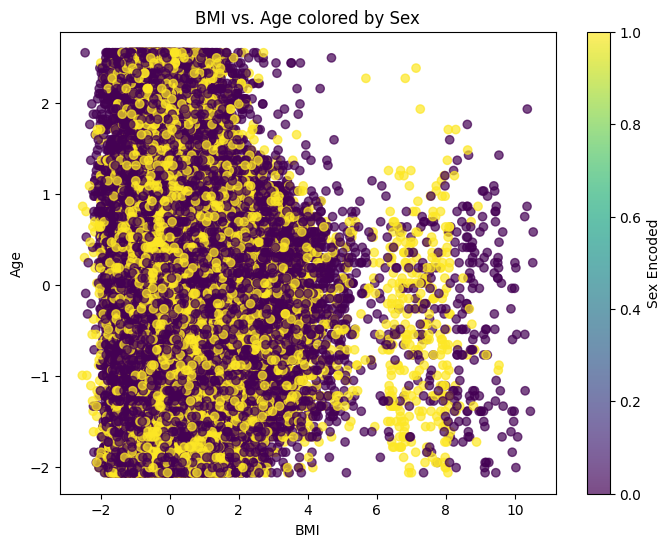

In [30]:
# prompt: Plot the graph between BMI, age and 'sex_encoded'

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'BMI', 'age', and 'sex_encoded' columns

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Body Mass Index'], df['Age'], c=df['Sex_encoded'], cmap='viridis', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs. Age colored by Sex')
plt.colorbar(label='Sex Encoded')
plt.show()


# 2.5 Model Training

In [31]:
df.keys()

Index(['ID', 'Body Mass Index', 'Age', 'Income_Level_Encoded',
       'Income_Level_TargetEncoded', 'Income_Level_Midpoint',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded', 'Told High Cholesterol_encoded',
       'Cholesterol Checked_encoded', 'Smoked 100+ Cigarettes_encoded',
       'Diagnosed Stroke_encoded', 'Diagnosed Diabetes_encoded',
       'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded'],
      dtype='object')

Select between Income_Level_TargetEncoded, Income_Level_Midpoint, Income_Level_Encoded

In [32]:
keyschosen = ['Body Mass Index', 'Age', 'Income_Level_TargetEncoded',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded', 'Told High Cholesterol_encoded',
       'Cholesterol Checked_encoded', 'Smoked 100+ Cigarettes_encoded',
       'Diagnosed Stroke_encoded', 'Diagnosed Diabetes_encoded',
       'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded']
df_chosen = df[keyschosen]
df_chosen.head()

,Body Mass Index,Age,Income_Level_TargetEncoded,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,1.869050,0.525500,1.402763,0,1,1,1,1,0,0,0,0,1,0,4,1,0,2,1
1,-0.571518,-0.262206,1.296156,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,-0.127371,0.356706,-1.087717,0,1,1,1,0,0,0,0,0,1,1,4,1,0,2,1
3,-0.175225,1.088147,0.041974,0,1,0,1,0,0,0,1,0,1,0,2,0,0,5,1
5,-0.459360,0.694294,-1.087717,0,1,1,1,1,0,0,1,0,1,0,2,0,1,0,1


In [33]:
from sklearn.model_selection import train_test_split

X = df_chosen.drop('History of HeartDisease or Attack_encoded', axis=1)
y = df_chosen['History of HeartDisease or Attack_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
len(X_train)

177112

In [35]:
y_train.value_counts()

,count
History of HeartDisease or Attack_encoded,
0,162758
1,14354


## Balance Data

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Check the class distribution after resampling
# print(y_train_resampled.value_counts())

diabetes
0    73203
1    73203
Name: count, dtype: int64


## Training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
X_test

,Body Mass Index,Age,Income_Level_TargetEncoded,High Blood Pressure_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
205556,-1.974246,0.975618,1.402763,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1
58834,-0.839203,0.187912,-1.087717,1,1,1,1,0,0,1,0,0,0,0,0,0,2,1
85621,0.403513,1.200677,-1.087717,1,1,1,0,0,0,0,0,1,0,1,1,0,2,1
169894,0.161251,-0.431000,-1.087717,1,0,1,1,0,0,1,1,1,0,1,0,1,4,1
7321,-0.975288,2.325971,2.220370,1,2,0,1,0,0,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,0.397531,0.300441,2.220370,1,1,1,0,0,0,0,0,1,0,3,0,0,5,1
125159,-0.504223,-0.599794,-1.087717,0,0,1,1,0,0,1,0,1,0,1,0,1,2,1
211882,2.215993,-0.205941,1.016499,0,0,1,1,0,0,0,0,1,0,4,1,0,4,1
9997,1.360598,0.975618,0.596373,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0


In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9183341614345725
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     40564
           1       0.56      0.12      0.20      3714

    accuracy                           0.92     44278
   macro avg       0.74      0.55      0.58     44278
weighted avg       0.89      0.92      0.89     44278



## Saving Model and Load Model

In [ ]:
import pickle

# Save Model
filename = 'diabetes_model.pkl'  # Changed extension to .pkl
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Load Model
filename = 'diabetes_model_1.pkl'  # Load with .pkl
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy of loaded model: {accuracy_loaded}")

print(classification_report(y_test, y_pred_loaded))

Accuracy of loaded model: 0.96075
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.88      0.63      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



## Sklearn Classification Models

For more details, visit the [Scikit-Learn official documentation](https://scikit-learn.org/stable/).

- **Logistic Regression:** `sklearn.linear_model.LogisticRegression`
- **Support Vector Machine (SVC):** `sklearn.svm.SVC`
- **K-Nearest Neighbors (KNN):** `sklearn.neighbors.KNeighborsClassifier`
- **Decision Tree Classifier:** `sklearn.tree.DecisionTreeClassifier`
- **Random Forest Classifier:** `sklearn.ensemble.RandomForestClassifier`
- **Gradient Boosting Classifier:** `sklearn.ensemble.GradientBoostingClassifier`
- **XGBoost Classifier (if installed separately):** `xgboost.XGBClassifier`
- **Naive Bayes (Gaussian, Multinomial, Bernoulli):**  
  - `sklearn.naive_bayes.GaussianNB`
  - `sklearn.naive_bayes.MultinomialNB`
  - `sklearn.naive_bayes.BernoulliNB`
- **Neural Network (MLP - Multi-layer Perceptron):** `sklearn.neural_network.MLPClassifier`
- **Bagging Classifier:** `sklearn.ensemble.BaggingClassifier`
- **AdaBoost Classifier:** `sklearn.ensemble.AdaBoostClassifier`
- **Extra Trees Classifier:** `sklearn.ensemble.ExtraTreesClassifier`


In [40]:
# prompt: using the decision Tree Classifier to see the feature_importance of the X_train, y_train

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Print feature importances
for feature_name, importance in zip(X_train.columns, feature_importances):
  print(f"{feature_name}: {importance}")

Body Mass Index: 0.35729936484580316
Age: 0.18128422664377725
Income_Level_TargetEncoded: 0.09524062455794638
High Blood Pressure_encoded: 0.017554049847901442
Told High Cholesterol_encoded: 0.02031184034552788
Cholesterol Checked_encoded: 0.008094720307897851
Smoked 100+ Cigarettes_encoded: 0.021300452686550914
Diagnosed Stroke_encoded: 0.02298580947198329
Diagnosed Diabetes_encoded: 0.019890866689128282
Leisure Physical Activity_encoded: 0.02800527015599469
Heavy Alcohol Consumption_encoded: 0.008475173036010435
Health Care Coverage_encoded: 0.006961677478284612
Doctor Visit Cost Barrier_encoded: 0.014774798289863177
General Health_encoded: 0.07556397052476105
Difficulty Walking_encoded: 0.020785920942432423
Sex_encoded: 0.017344943946967846
Education Level_encoded: 0.06381058361158991
Vegetable or Fruit Intake (1+ per Day)_encoded: 0.020315706617579393


In [61]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                           Feature  Importance
0                                  Body Mass Index    0.354256
1                                              Age    0.183783
2                       Income_Level_TargetEncoded    0.094865
13                          General Health_encoded    0.076189
16                         Education Level_encoded    0.063740
9                Leisure Physical Activity_encoded    0.028100
7                         Diagnosed Stroke_encoded    0.023039
14                      Difficulty Walking_encoded    0.021158
6                   Smoked 100+ Cigarettes_encoded    0.020954
4                    Told High Cholesterol_encoded    0.020344
8                       Diagnosed Diabetes_encoded    0.020146
17  Vegetable or Fruit Intake (1+ per Day)_encoded    0.019812
3                      High Blood Pressure_encoded    0.017945
15                                     Sex_encoded    0.017645
12               Doctor Visit Cost Barrier_encoded    0

- Heavy Alcohol Consumption_encoded (0.008606)
- Cholesterol Checked_encoded (0.008141)
- Health Care Coverage_encoded (0.007131)
- Doctor Visit Cost Barrier_encoded (0.014146)
- Sex_encoded (0.017645)
- High Blood Pressure_encoded (0.017945)
- Vegetable or Fruit Intake (1+ per Day)_encoded (0.019812)

We need to drop the table here

In [ ]:
X = df_chosen.drop('History of HeartDisease or Attack_encoded', axis=1)
y = df_chosen['History of HeartDisease or Attack_encoded']

In [ ]:
# List of features to drop
features_to_drop = ['Heavy Alcohol Consumption_encoded', 'Cholesterol Checked_encoded',
                    'Health Care Coverage_encoded', 'Doctor Visit Cost Barrier_encoded',
                    'Sex_encoded', 'High Blood Pressure_encoded',
                    'Vegetable or Fruit Intake (1+ per Day)_encoded']

# Drop the features from X
X = X.drop(columns=features_to_drop)

## 3.2 AutoGluon

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularPredictor

# # Assuming df_chosen is your prepared dataframe with 'diabetes' as the target variable
# X = df_chosen.drop('diabetes', axis=1)
# y = df_chosen['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and target for AutoGluon
train_data = X_train.copy()
train_data['History of HeartDisease or Attack_encoded'] = y_train

test_data = X_test.copy()
test_data['History of HeartDisease or Attack_encoded'] = y_test

# Define the label column
label_column = 'History of HeartDisease or Attack_encoded'

# Create and train the AutoGluon predictor
predictor = TabularPredictor(label=label_column).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250214_155346"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.36 GB / 12.67 GB (81.8%)
Disk Space Avail:   78.52 GB / 112.64 GB (69.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

In [ ]:
# Evaluate the predictor
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

# Predict on test data
y_pred = predictor.predict(test_data)
print(classification_report(y_test,y_pred))


# Save the predictor
predictor.save('/content/drive/MyDrive/autogluon_model')